In [1]:
import numpy as np
import pandas as pd

In [2]:
def loadDataset(filename):
    df = pd.read_csv(filename, sep=';')
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values
    return X, y

In [3]:
def fillMissingData(X):
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    X[:, 1:] = imputer.fit_transform(X[:, 1:])
    return X

In [4]:
def computeCategorization(X):
    from sklearn.preprocessing import LabelEncoder
    lb_X = LabelEncoder()
    X[:, 0] = lb_X.fit_transform(X[:, 0])

    # One Hot Encoding
    D = pd.get_dummies(X[:, 0])
    X = X[:, 1:]
    X = np.insert(X, 0, D.values, axis = 1)
    return X

In [5]:
def splitTrainTestSets(X, y, testSize):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = testSize, random_state= 42)
    return X_train, X_test, y_train, y_test

In [6]:
def computeScaling(train, test):
    from sklearn.preprocessing import StandardScaler
    scaleX = StandardScaler()
    train = scaleX.fit_transform(train)
    test = scaleX.fit_transform(test)
    return train, test

In [7]:
def computeLinearRegressionModel (X_train, X_test, y_train, y_test):
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print(y_test, y_pred)

    import matplotlib.pyplot as plt
    plt.scatter(X_test[:, -1], y_test, color = 'red')
    plt.plot(X_test[:, -1], regressor.predict(X_test), color = 'blue')
    plt.title('Inscritos x Visualizações (SVBR)')
    plt.xlabel('Total de inscritos')
    plt.ylabel('Total de Visualizações')
    plt.show()

In [8]:
def runLinearRegressionExample(filename):
    X, y = loadDataset(filename)
    X = fillMissingData(X)
    X = computeCategorization(X)    
    X_train, X_test, y_train, y_test = splitTrainTestSets(X, y, 0.2)
    computeLinearRegressionModel (X_train, X_test, y_train, y_test)

[  1616496 118741623  12139385   2139717   3375528     82599     43662
   5027880   1575456    683190] [ 4969257.22161496 56722621.56057101 24124814.6253007   3353493.33280677
  8112662.17090474  -511781.65962689  -415483.17726542  7733901.5429945
  1255164.81526863  -331046.09461027]


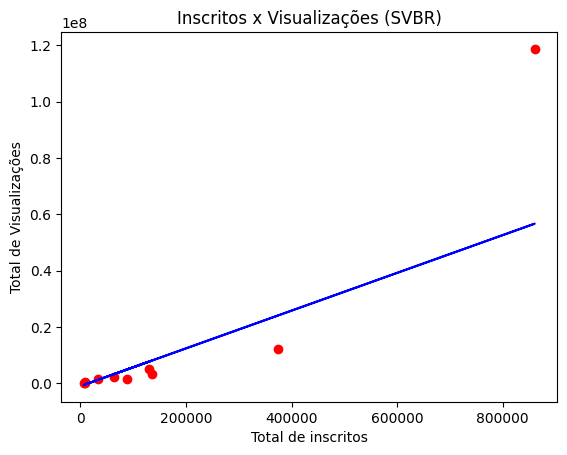

In [9]:
if __name__ == '__main__':
    runLinearRegressionExample('svbr.csv')